In [45]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [26]:
dataset = pd.read_csv('../workshop/heart_failure_clinical_records_dataset.csv')
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [37]:
# Random samling
train = dataset.sample(frac=0.8)
test = dataset.drop(train.index)

#Stratifide sampling
train = dataset.groupby('DEATH_EVENT', group_keys=False)[dataset.columns].sample(frac=0.8)
test = dataset.drop(train.index)

train2 = train_test_split(dataset, test_size=0.2, stratify=dataset['DEATH_EVENT'])

print(train['DEATH_EVENT'].value_counts()/train.shape[0])
print(test['DEATH_EVENT'].value_counts()/test.shape[0])

DEATH_EVENT
0    0.677824
1    0.322176
Name: count, dtype: float64
DEATH_EVENT
0    0.683333
1    0.316667
Name: count, dtype: float64


In [40]:
train_features = train.drop('DEATH_EVENT', axis=1)
train_targets = train['DEATH_EVENT']
test_features = test.drop('DEATH_EVENT', axis=1)
test_targets = test['DEATH_EVENT']

In [41]:
classifier1 = DecisionTreeClassifier()
#classifier1.fit(train.drop('DEATH_EVENT', axis=1), train['DEATH_EVENT'])
classifier1.fit(train_features, train_targets)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [44]:
classifier1.score(test_features, test_targets)

0.7

In [48]:
train_predictions = classifier1.predict(train_features)
test_predictions = classifier1.predict(test_features)
print(f'Accuracy {accuracy_score(train_targets, train_predictions)}')
print(f'Percition {precision_score(train_targets, train_predictions)}')
print(f'Recall {recall_score(train_targets, train_predictions)}')

print(f'Accuracy {accuracy_score(test_targets, test_predictions)}')
print(f'Percition {precision_score(test_targets, test_predictions)}')
print(f'Recall {recall_score(test_targets, test_predictions)}')

Accuracy 1.0
Percition 1.0
Recall 1.0
Accuracy 0.7
Percition 0.5172413793103449
Recall 0.7894736842105263


In [57]:
classifier2 = DecisionTreeClassifier(max_depth=5)
#classifier1.fit(train.drop('DEATH_EVENT', axis=1), train['DEATH_EVENT'])
classifier2.fit(train_features, train_targets)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [58]:
train_predictions2 = classifier2.predict(train_features)
test_predictions2 = classifier2.predict(test_features)
print(f'Accuracy {accuracy_score(train_targets, train_predictions2)}')
print(f'Percition {precision_score(train_targets, train_predictions2)}')
print(f'Recall {recall_score(train_targets, train_predictions2)}')

print(f'Accuracy {accuracy_score(test_targets, test_predictions2)}')
print(f'Percition {precision_score(test_targets, test_predictions2)}')
print(f'Recall {recall_score(test_targets, test_predictions2)}')

Accuracy 0.9539748953974896
Percition 0.9230769230769231
Recall 0.935064935064935
Accuracy 0.7166666666666667
Percition 0.5384615384615384
Recall 0.7368421052631579


Matplotlib is building the font cache; this may take a moment.


[Text(0.4267241379310345, 0.9166666666666666, 'x[11] <= 73.5\ngini = 0.437\nsamples = 239\nvalue = [162, 77]'),
 Text(0.1724137931034483, 0.75, 'x[8] <= 136.5\ngini = 0.285\nsamples = 58\nvalue = [10, 48]'),
 Text(0.2995689655172414, 0.8333333333333333, 'True  '),
 Text(0.10344827586206896, 0.5833333333333334, 'x[7] <= 1.05\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(0.06896551724137931, 0.4166666666666667, 'x[0] <= 78.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.034482758620689655, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10344827586206896, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.13793103448275862, 0.4166666666666667, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.2413793103448276, 0.5833333333333334, 'x[8] <= 139.5\ngini = 0.428\nsamples = 29\nvalue = [9, 20]'),
 Text(0.20689655172413793, 0.4166666666666667, 'x[11] <= 11.5\ngini = 0.5\nsamples = 18\nvalue = [9, 9]'),
 Text(0.1724137931034483, 0.25, 'gini = 0.0\nsamples = 

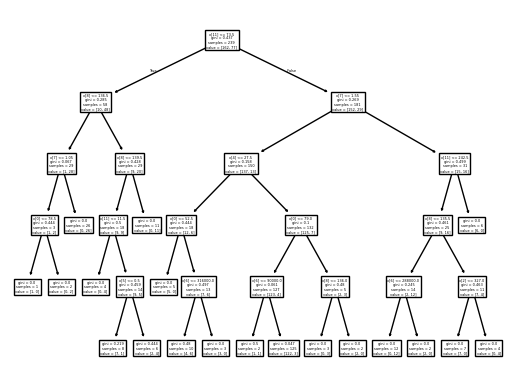

In [60]:
from sklearn.tree import plot_tree
plot_tree(classifier2)